<H1>Time Series Analysis with <b>Stats Model</b></H1>
<h4>Data Source: UCI Machine Learning Repo</h4>


<p>This is a part of self-learning and enhancement of knowledge in the field of Data Science.<br>
In this Project, We will evaluate The performance of suitable <b><span style="color:blue;font-size:15pt">StatsModel Methods</span> This project will also shows of detailed analysis of Metro interstate Traffic Volume in <b>Minneapolis-St. Paul</b>.    
</p>

<h3>Dataset Description</h3>
<ul>
    <li>Dataset File_Format: CSV File[NORMAL_DLY_sample_csv.csv]</li>
    <li>Dataset Source link: <a href="http://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#">UCI ML Repository</a></li>
    <li>Reference of resource: Github, Kaggle, Packt Publishing books, Coursera.org, Udemy.com, Stackoverflow.com</li>
    <li>Number Of Variables: <b>48204</b></li>
    <li>Dataset consist of 9 set of Attributes which are as follows:
        <ul>
            <li><b>Holiday</b>: Categorical US National holidays plus regional holiday, <i><b>Minnesota State Fair</b></i></li>
            <li><b>Temperature</b>: Number of average temperature in <i><b>Kelvin</b></i>.</li>
            <li><b>Rain_1h</b>:  Numeric Amount in mm of rain that occurred in the hour</li> 
            <li><b>Snow_1h</b>:  Numeric Amount in mm of snow that occurred in the hour.</li> 
            <li><b>Cloud</b>: Numeric Percentage of cloud cover.</li> 
            <li><b>Weather_main</b>: Categorical Short textual description of the current weather.</li> 
            <li><b>Weather_description</b>: Categorical Longer textual description of the current weather.</li>
            <li><b>Date_time</b>:  DateTime Hour of the data collected in local CST time From 2012~2018.</li> 
            <li><b>Traffic_volume</b>: Numeric Hourly I-94 ATR 301 reported westbound traffic volume.</li>      
        </ul></li>
</ul>    

<h3><b>*~Background~*</b></h3>
<p style="font-family:Courier New"; text-indent:initial; text-size:20pt;>Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.<br>
A 2015 Minnesota Department of Transportation report found that 23.4 percent of the 758-mile-long metro freeway network was congested. That’s the highest recorded value since MnDOT began tracking congestion in 1993. Using different methodology, Andrew Owen’s team at the University of Minnesota found that the impact of congestion on job access in the Twin Cities was the 23rd largest out of 50 major metro areas. Overall, Owen estimated that the typical Twin Cities resident could reach 10 percent fewer jobs within 30 minutes because of congestion. Los Angeles had the most congestion impact, with accessible jobs reduced by 30 percent by traffic, and Salt Lake City the least, at less than 1 percent.    

</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip3 install fbprophet
#Installing fbprophet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [62]:
#Reading the Data
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [52]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [41]:
print("Total Variable {} \n {}".format(len(df),df.groupby('weather_main').size()))

Total Variable 48204 
 weather_main
Clear           13391
Clouds          15164
Drizzle          1821
Fog               912
Haze             1360
Mist             5950
Rain             5672
Smoke              20
Snow             2876
Squall              4
Thunderstorm     1034
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e15fc2a20>,
      dtype=object)

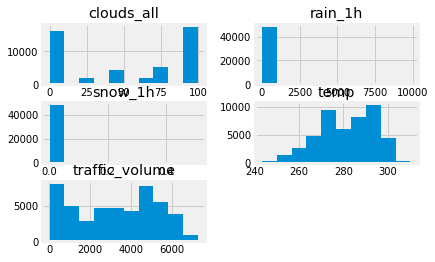

In [53]:
df.hist()

In [43]:
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

As Datatypes shows different datatype for Traffice Volume, clouds_all and has Kelvin in temp

In [44]:
df.groupby('holiday').size()

holiday
Christmas Day                    6
Columbus Day                     5
Independence Day                 5
Labor Day                        7
Martin Luther King Jr Day        6
Memorial Day                     5
New Years Day                    6
None                         48143
State Fair                       5
Thanksgiving Day                 6
Veterans Day                     5
Washingtons Birthday             5
dtype: int64

In [45]:
Weather = df.groupby('weather_main').size()

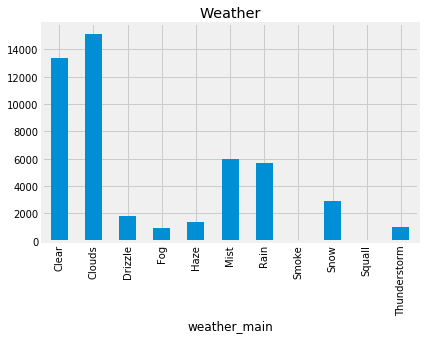

In [46]:
Weather.plot.bar()
plt.title("Weather")
plt.show()

<h4>Most of the days was Cloudy from 2012~2018</h4>

In [54]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.259537,0.334264,0.000222,49.362231,3259.827048
std,12.712444,44.789133,0.008168,39.015750,1986.846447
min,243.390000,0.000000,0.000000,0.000000,10.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [63]:
#converting of Kelvin temp to Celcius
df['temp'] = df['temp']-273.15
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [64]:
#converting Date_time to Date_time Object
df['date_time']=pd.to_datetime(df['date_time'])
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [65]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,8.109537,0.334264,0.000222,49.362231,3259.827048
std,12.712444,44.789133,0.008168,39.015750,1986.846447
min,-29.760000,0.000000,0.000000,0.000000,10.000000
25%,-0.990000,0.000000,0.000000,1.000000,1193.000000
50%,9.300000,0.000000,0.000000,64.000000,3380.000000
75%,18.656000,0.000000,0.000000,90.000000,4933.000000
max,36.920000,9831.300000,0.510000,100.000000,7280.000000


In [66]:
df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

In [67]:
df.set_index('date_time', inplace=True)

In [68]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,15.13,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,16.21,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,16.43,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,16.98,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,17.99,0.0,0.0,75,Clouds,broken clouds,4918


In [69]:
df.groupby(pd.TimeGrouper('M')).sum()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2012-10-31,6720.870,0.00,0.0,52311,2806826
2012-11-30,2120.490,0.00,0.0,46874,2510769
2012-12-31,-4128.240,0.00,0.0,67907,2891172
2013-01-31,-5981.390,0.00,0.0,41668,2226480
2013-02-28,-5447.510,0.00,0.0,49499,2268026
2013-03-31,-2028.400,0.00,0.0,38004,2272416
2013-04-30,2887.680,0.00,0.0,59911,3097942
2013-05-31,12462.110,0.00,0.0,57638,3202233
2013-06-30,14305.790,462.20,0.0,38800,2586575


In [70]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [71]:
Monthly_traffic = df.groupby(pd.TimeGrouper('M')).sum()

In [72]:
Mean_trafiic = int(Monthly_traffic['traffic_volume'].mean())

In [73]:
Monthly_traffic.replace({'traffic_volume':{0 : Mean_trafiic}}, inplace=True)

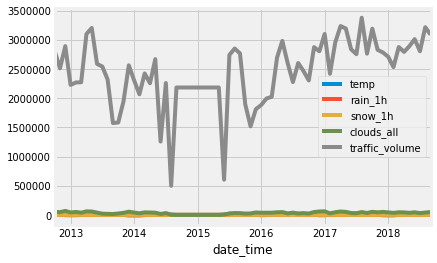

In [74]:
Monthly_traffic.plot()

In [75]:
test = Monthly_traffic['2016-09-30':'2018-09-30']

In [76]:
print(test.index.min())

2016-09-30 00:00:00


In [77]:
test = test.iloc[:,-1]

In [78]:
test

date_time
2016-09-30    2464428
2016-10-31    2302780
2016-11-30    2873565
2016-12-31    2802858
2017-01-31    3099879
2017-02-28    2417634
2017-03-31    2953916
2017-04-30    3234905
2017-05-31    3192613
2017-06-30    2836104
2017-07-31    2753518
2017-08-31    3377220
2017-09-30    2762019
2017-10-31    3190239
2017-11-30    2827781
2017-12-31    2782328
2018-01-31    2709240
2018-02-28    2531621
2018-03-31    2875997
2018-04-30    2791984
2018-05-31    2889329
2018-06-30    3010617
2018-07-31    2802936
2018-08-31    3215339
2018-09-30    3087570
Freq: M, Name: traffic_volume, dtype: int64

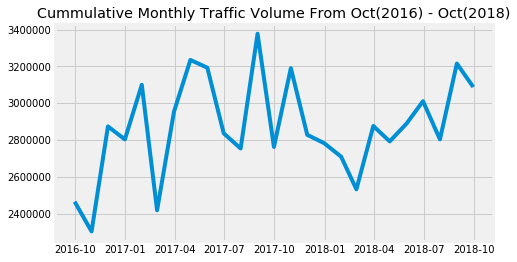

In [79]:
s=(7,4)
fig, ax = plt.subplots(figsize=s)
plt.title("Cummulative Monthly Traffic Volume From Oct(2016) - Oct(2018)")
sns.lineplot(data=test)
plt.savefig("Pic.jpg")

In [80]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,8.109537,0.334264,0.000222,49.362231,3259.827048
std,12.712444,44.789133,0.008168,39.015750,1986.846447
min,-29.760000,0.000000,0.000000,0.000000,10.000000
25%,-0.990000,0.000000,0.000000,1.000000,1193.000000
50%,9.300000,0.000000,0.000000,64.000000,3380.000000
75%,18.656000,0.000000,0.000000,90.000000,4933.000000
max,36.920000,9831.300000,0.510000,100.000000,7280.000000


In [81]:
test2 = df.iloc[:,-1]

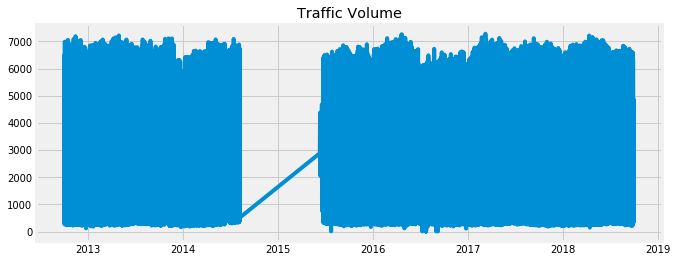

In [82]:
s=(10,4)
fig, ax = plt.subplots(figsize=s)
plt.title("Traffic Volume")
sns.lineplot(data=test2)

<h4>As there is irregularities in the data from September 2014 to May 2015</h4>
<p>Conclusion: Data wasn't gathered for the particular time period. as mnroad operations lane-closure for maintainance or errors in collection of data. Only Some of the days data was recorded.<p>

<h4>Analysing only traffic volume in the cloudy days </h4>

In [83]:
f = df.loc[df['weather_main'] == 'Clouds']
f_mean = int(f['traffic_volume'].mean())

In [84]:
y = f['traffic_volume'].resample('MS').mean()
y.fillna(value=f_mean,inplace=True)

<p>Replacing the null data with mean values</p>

In [87]:
y['2014':]

date_time
2014-01-01    2973.950549
2014-02-01    3371.924933
2014-03-01    3277.642166
2014-04-01    3431.108179
2014-05-01    3788.704861
2014-06-01    3291.728814
2014-07-01    3975.274247
2014-08-01    4688.757576
2014-09-01    3618.000000
2014-10-01    3618.000000
2014-11-01    3618.000000
2014-12-01    3618.000000
2015-01-01    3618.000000
2015-02-01    3618.000000
2015-03-01    3618.000000
2015-04-01    3618.000000
2015-05-01    3618.000000
2015-06-01    4183.275862
2015-07-01    4096.184971
2015-08-01    3770.184524
2015-09-01    3725.602273
2015-10-01    4030.056075
2015-11-01    3176.445312
2015-12-01    3064.570248
2016-01-01    3318.433071
2016-02-01    3324.543210
2016-03-01    3995.590551
2016-04-01    3679.845000
2016-05-01    3804.388298
2016-06-01    3606.098315
2016-07-01    3094.308252
2016-08-01    3628.262887
2016-09-01    3733.281818
2016-10-01    3283.738676
2016-11-01    3983.441176
2016-12-01    3445.953216
2017-01-01    3421.089552
2017-02-01    3525.312500
20

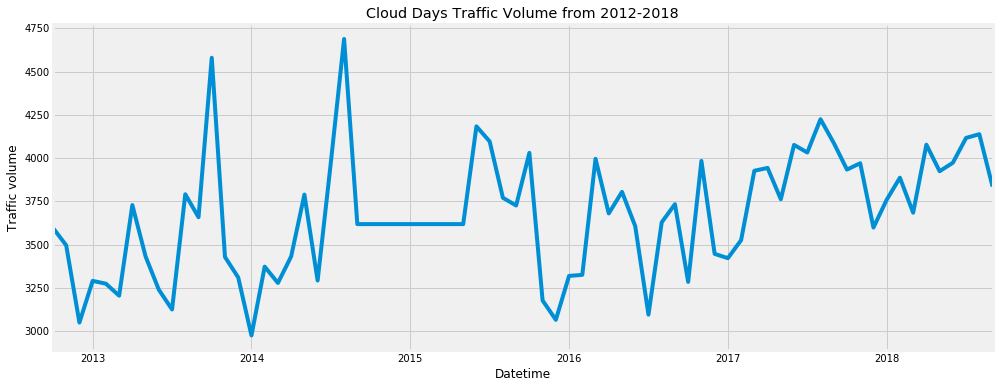

In [88]:
y.plot(figsize=(15, 6))
plt.title("Cloud Days Traffic Volume from 2012-2018")
plt.xlabel("Datetime")
plt.ylabel("Traffic volume")
plt.savefig('pic.jpg')
plt.show()

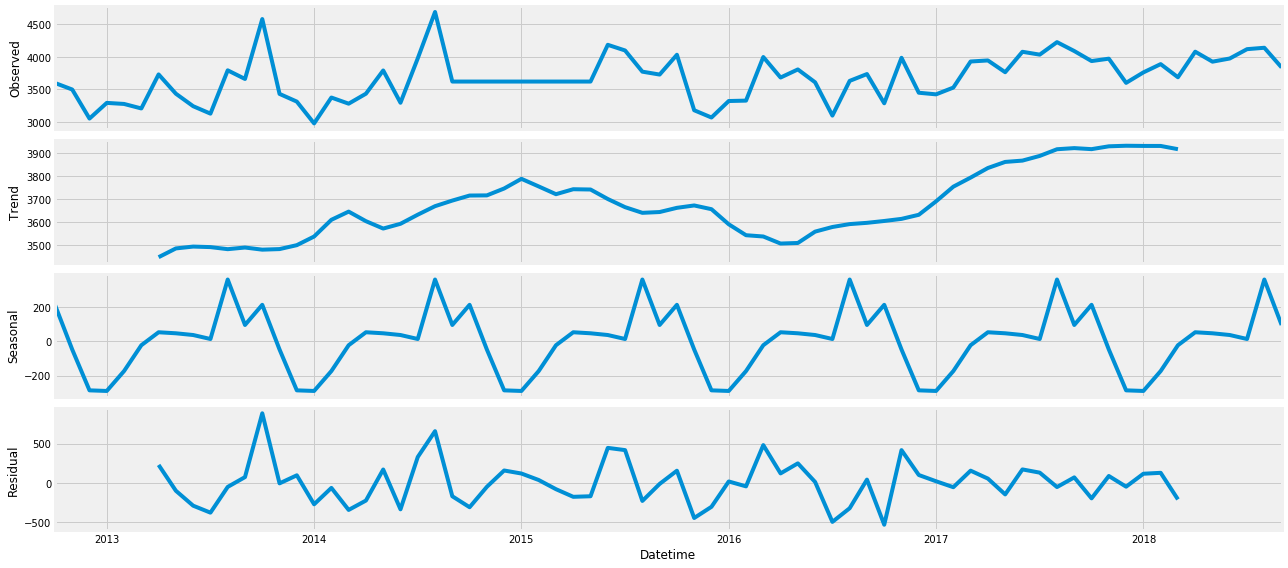

In [90]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomp = sm.tsa.seasonal_decompose(y,model='additive')
fig = decomp.plot()
plt.xlabel("Datetime")
plt.savefig('pic1.jpg')
plt.show()

<p>The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.</p>

<p>For the Time Series analysis using statsmodel we will be using <b>ARIMA</b>(Autoregressive Integrated Moving Average) method where it models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.<br>
It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).</p>

In [92]:
import itertools
a = b = c = range(0, 2)
pdq = list(itertools.product(a, b, c))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(a, b, c))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [97]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue           

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1369.7909007892388
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1076.450610450051
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:888.8093924673624
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:693.492417195887
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:908.1631742035377
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:875.8808427764585
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:709.7420742268071
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:695.684374765572
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1267.4222628325722
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:993.6669560727906
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:872.629950302462
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:676.6517194477456
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:905.8737407623399


/home/jetfire/.conda/envs/Spark/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:866.0526404408047
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:706.8790726289968
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:676.7690194586121
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1035.001320103795
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:848.1903758689165
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:899.0577626383938
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:687.8905325315036
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:872.372213845701
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:847.6456126504594
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:706.3370412725803
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:690.0249124707024
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1002.021190533675
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:823.0115639529431
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:865.8379864913243
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:654.9287437417343
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:858.391374831347
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:822.8774187893713
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:690.5985732688852
ARIMA(0, 1, 

/home/jetfire/.conda/envs/Spark/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:838.0148688346617
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:688.7612306327725
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:672.7147293279567
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1026.7212691080992
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:844.6630797000676
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:894.605465491098
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:679.1418692492825
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:845.2534496001093
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:845.0337101477601
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:686.3567431983091
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:680.4156134070591
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1000.16546447965
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:823.0285411647495
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:865.322400407065
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:656.8249596002188
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:836.1021461401472
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:822.5027109740221
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:677.6421194831629
ARIMA(1, 1, 

In [100]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_invertibility=False,
                                enforce_stationarity=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     traffic_volume   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -324.412
Date:                            Thu, 08 Aug 2019   AIC                            658.824
Time:                                    23:12:20   BIC                            667.858
Sample:                                10-01-2012   HQIC                           662.192
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0684      0.266      0.257      0.798      -0.454       0.591
ma.L1         -1.1576      0.169   

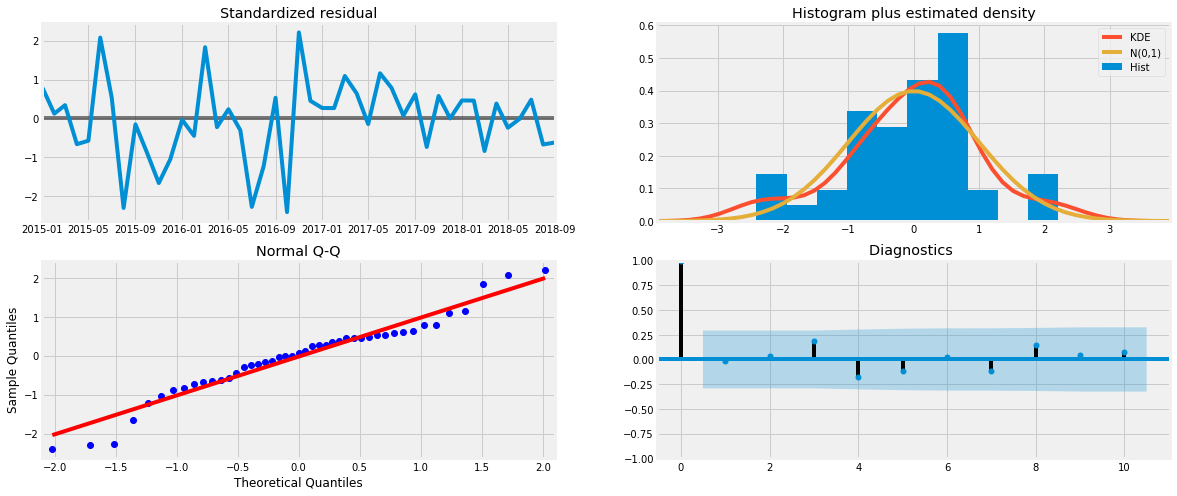

In [102]:
results.plot_diagnostics()
plt.title("Diagnostics ")
plt.savefig("dia.png")
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-10-01 to the end of the data.

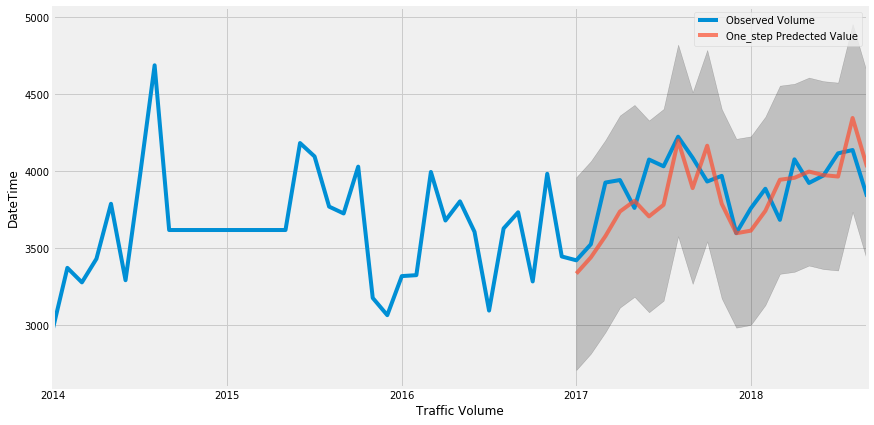

In [107]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'),dynamic=False)
pred_cli = pred.conf_int()

ax = y['2014':].plot(label = "Observed Volume")
pred.predicted_mean.plot(ax=ax,label="One_step Predected Value", alpha=.7,figsize=(13,7))
ax.fill_between(pred_cli.index,
                pred_cli.iloc[:,0],
                pred_cli.iloc[:,1],color='k', alpha=.2)
plt.legend()
plt.xlabel("Traffic Volume")
plt.ylabel("DateTime")
plt.show()

The line plot is showing the observed volume compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing a gradual upward trend starts from the beginning of the year.

In [108]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 35165.25


In [109]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 187.52


<p>In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.<br>
Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily traffic volume in cloudy days in the test set within <b>187.52</b> of the real traffic volume. Our traffic daily volume range from around 2200 to over 3600. In my opinion, this is a pretty good model so far.</p>

## Traffic Volume Forcasting 

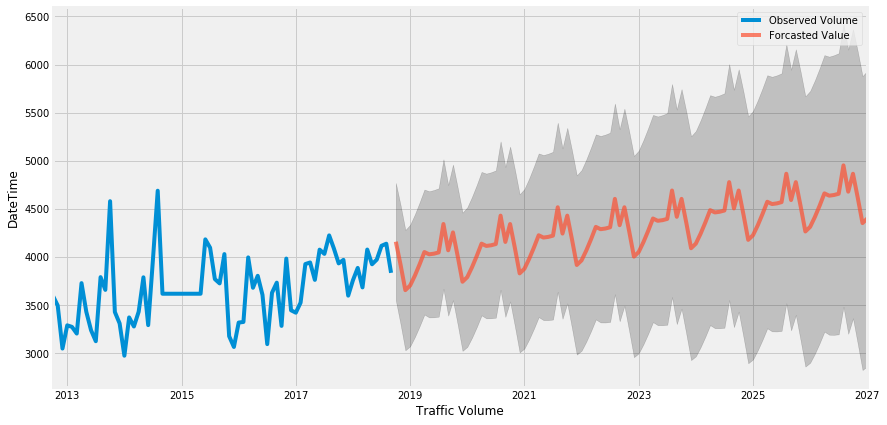

In [111]:
pred_ac = results.get_forecast(steps=100)
pred_cli = pred_ac.conf_int()

ax = y.plot(label = "Observed Volume")
pred_ac.predicted_mean.plot(ax=ax,label="Forcasted Value", alpha=.7,figsize=(13,7))
ax.fill_between(pred_cli.index,
                pred_cli.iloc[:,0],
                pred_cli.iloc[:,1],color='k', alpha=.2)
plt.legend()
plt.xlabel("Traffic Volume")
plt.ylabel("DateTime")
plt.show()

<p>Our model clearly captured traffic volume seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.<br>
The above time series analysis for cloudy days makes me curious about other days, and how do they compare with each other over time. Therefore, we are going to compare time series of cloudy days and clear days.</p>

## Time Series Traffic Volume comparison in <b>Cloudy Days</b> and <b>Clear Days</b>


In [150]:
cloudy_days = df.loc[df['weather_main'] == 'Clouds']
clear_days = df.loc[df['weather_main'] == 'Clear']

<p>According to our dataset there are more cloudy days than clear days</p>

In [151]:
cloudy_days.shape, clear_days.shape

((15164, 8), (13391, 8))

In [152]:
cols = ['holiday','temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description']
cloudy_days.drop(cols, axis=1, inplace=True)
clear_days.drop(cols, axis=1, inplace=True)

cloudy_days = cloudy_days.sort_values('date_time')
clear_days = clear_days.sort_values('date_time')

cloudy_days = cloudy_days.groupby('date_time')['traffic_volume'].sum().reset_index()
clear_days = clear_days.groupby('date_time')['traffic_volume'].sum().reset_index()

In [153]:
cloudy_days.head()

,date_time,traffic_volume
0,2012-10-02 09:00:00,5545
1,2012-10-02 10:00:00,4516
2,2012-10-02 11:00:00,4767
3,2012-10-02 12:00:00,5026
4,2012-10-02 13:00:00,4918


In [154]:
clear_days.head()

,date_time,traffic_volume
0,2012-10-02 14:00:00,5181
1,2012-10-02 15:00:00,5584
2,2012-10-02 16:00:00,6015
3,2012-10-02 20:00:00,2784
4,2012-10-02 21:00:00,2361


In [155]:
clear_days.dtypes

date_time         datetime64[ns]
traffic_volume             int64
dtype: object

In [156]:
cloudy_days.set_index('date_time', inplace=True)
clear_days.set_index('date_time',inplace=True)

x_cloudy = cloudy_days['traffic_volume'].resample('MS').mean()
x_clear = clear_days['traffic_volume'].resample('MS').mean()

cloudy_days = pd.DataFrame({"Date-Time":x_cloudy.index,"Traffic_Volume":x_cloudy.values})
clear_days = pd.DataFrame({"Date-Time":x_clear.index,"Traffic_Volume":x_clear.values})

traffic = cloudy_days.merge(clear_days,how="inner",on="Date-Time")
traffic.head()

,Date-Time,Traffic_Volume_x,Traffic_Volume_y
0,2012-10-01,3596.385204,3154.310078
1,2012-11-01,3503.406467,3037.582278
2,2012-12-01,3048.425676,2866.309278
3,2013-01-01,3309.626140,2658.216216
4,2013-02-01,3273.416168,3716.647887


In [157]:
traffic.rename(columns={'Traffic_Volume_x': 'Cloudy Days', 'Traffic_Volume_y': 'Clear Days'}, inplace=True)

In [158]:
traffic.head()

,Date-Time,Cloudy Days,Clear Days
0,2012-10-01,3596.385204,3154.310078
1,2012-11-01,3503.406467,3037.582278
2,2012-12-01,3048.425676,2866.309278
3,2013-01-01,3309.626140,2658.216216
4,2013-02-01,3273.416168,3716.647887


In [159]:
traffic

,Date-Time,Cloudy Days,Clear Days
0,2012-10-01,3596.385204,3154.310078
1,2012-11-01,3503.406467,3037.582278
2,2012-12-01,3048.425676,2866.309278
3,2013-01-01,3309.626140,2658.216216
4,2013-02-01,3273.416168,3716.647887
5,2013-03-01,3204.033058,3286.557018
6,2013-04-01,3728.152091,3276.413636
7,2013-05-01,3430.972028,3090.995833
8,2013-06-01,3238.733840,3521.653061
9,2013-07-01,3124.301115,3731.970779


## Replacing NAN Values for better visualization

In [162]:
traffic['Cloudy Days'].fillna(value=(traffic['Cloudy Days'].mean()),inplace=True)
traffic['Clear Days'].fillna(value=(traffic['Clear Days'].mean()),inplace=True)

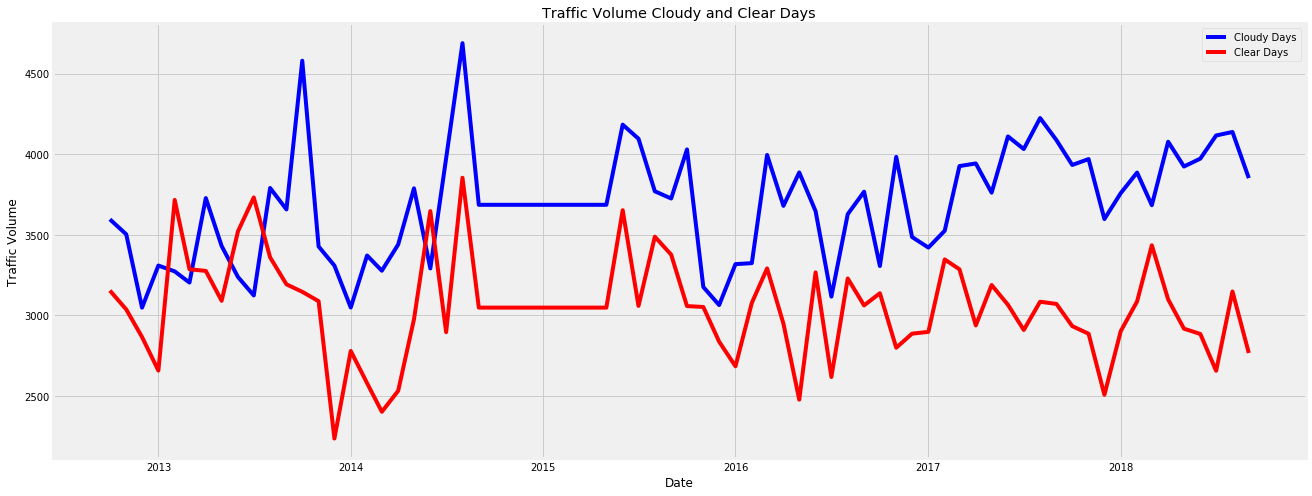

In [164]:
plt.figure(figsize=(20, 8))
plt.plot(traffic['Date-Time'], traffic['Cloudy Days'], 'b-', label = 'Cloudy Days')
plt.plot(traffic['Date-Time'], traffic['Clear Days'], 'r-', label = 'Clear Days')
plt.xlabel('Date'); plt.ylabel('Traffic Volume'); plt.title('Traffic Volume Cloudy and Clear Days')
plt.legend();

<p>We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two types of days. It seems starting of winter time is quiet for traffic ini clear days too. in addition, average traffic on cloudy days are higher than those on clear days in most of the months. It is understandable, the summers are warm and wet; the winters are freezing, snowy, and windy; and it is partly <b>cloudy</b> year round.</p> 

In [166]:
first_date = traffic.ix[np.min(list(np.where(traffic['Clear Days'] > traffic['Cloudy Days'])[0])), 'Date-Time']

print("Traffic on Clear day was way more than on Cloudy day for the first time on:{}.".format(first_date.date()))

Traffic on Clear day was way more than on Cloudy day for the first time on:2013-02-01.


### it was on Feb 2013 where traffic was more than on usual cloudy days